In [1]:
import gc 
import numpy as np # linear algebra
from numpy import hstack
from numpy import array
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt  # Matlab-style plotting
from sklearn.preprocessing import StandardScaler
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew #for some statistics

np.seterr(divide = 'ignore') 


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
# read saved train data: imputed X by univariate
temp = pd.read_csv('/Users/laurenflemmer/Desktop/zillow_proj/data/univariate_imputed_data.csv')
df = pd.read_csv('/Users/laurenflemmer/Desktop/zillow_proj/data/train_data_no_one_hot.csv')


In [3]:
# add price and location features to data
cols_to_add = ['price', 'in_90210', 'in_90402', 'in_90272', 'in_90077', 'in_90266', 'in_90291', 'in_90254', 'in_90275', 'in_92657',
       'in_92662', 'in_92661', 'in_92625', 'in_92651', 'in_92660']

df[cols_to_add] = temp[cols_to_add]

In [4]:
# remove unnecessary features
df.drop(['taxdelinquencyflag'], axis = 1, inplace = True)
df.drop(['structuretaxvaluedollarcnt'], axis = 1, inplace = True)
df.drop(['landtaxvaluedollarcnt'], axis = 1, inplace = True)
df.drop(['Unnamed: 0'], axis = 1, inplace = True)
df.drop(['Unnamed: 0.1'], axis = 1, inplace = True)


In [5]:
df.head()

,airconditioningtypeid,bathroomcnt,bedroomcnt,buildingqualitytypeid,decktypeid,calculatedfinishedsquarefeet,fips,fireplacecnt,garagecarcnt,garagetotalsqft,...,in_90266,in_90291,in_90254,in_90275,in_92657,in_92662,in_92661,in_92625,in_92651,in_92660
0,1.0,1.0,2.0,4.0,0.0,714.0,6037.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
1,1.0,3.0,3.0,8.0,0.0,2273.0,6037.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,6.0,0.0,1248.0,6037.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
3,1.0,2.0,3.0,6.0,0.0,1052.0,6037.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0
4,1.0,3.0,3.0,7.0,0.0,1585.0,6037.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0


In [5]:

float_var = ["bathroomcnt", 
                   "bedroomcnt", 
                   "buildingqualitytypeid", 
                   "calculatedfinishedsquarefeet",
                  "fireplacecnt", 
                   "garagecarcnt", 
                   "garagetotalsqft",
                   "dist_to_dtla", 
                   "dist_to_ocean", 
                   "lotsizesquarefeet", 
                   "poolcnt",
                  "poolsizesum", 
                   "unitcnt", 
                   "yardbuildingsqft17",
                    "price"]

df = df[(np.abs(stats.zscore(df[float_var])) < 3).all(axis=1)]

# remove outilers

In [6]:
# do a 80,20 split on each data, set a seed
import random
random.seed(222)
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2)
X_train = train_df.drop(['price'], axis =1)
Y_train = train_df['price']
X_test = test_df.drop(['price'], axis =1)
Y_test = test_df['price']

One of the most important steps in our data preprocessing is detecting and treating the outliers as they can negatively affect the statistical analysis and the training process of a machine learning algorithm resulting in lower accuracy. In this project, we will detect outliers using the Z-scores method, and define a threshold value of 3 and mark the datapoints whose absolute value of Z-score is greater than the threshold as outliers. Since we have imputed missing with mode/median in the EDA part, if we find any outliers in those columns, we will follow the same strategy. Otherwise, we will delete them directly

In [ ]:
# inputation with median columns
median_df = df[["buildingqualitytypeid", "lotsizesquarefeet", "bathroomcnt", "bedroomcnt", "calculatedfinishedsquarefeet",
                      "structuretaxvaluedollarcnt", "landtaxvaluedollarcnt"]]

# inputation with mode columns
mode_df = df[["airconditioningtypeid", "heatingorsystemtypeid", "unitcnt", "fips", 
                    "propertylandusetypeid", "regionidcounty", "yearbuilt"]]

remove outiler with z score greater than 3( only for continuous featrues)

In [14]:
# replace outliers with median or mode
def replace_outliers(df):
    df = df.copy() # make a copy of the orginal Dataframe
    for col1 in median_df.columns:
        col_median = df[col1].median()
        col_std = df[col1].std()
        df[col1] = np.where(np.abs(stats.zscore(df[col1]))>3, col_median,df[col1])
    for col2 in mode_df.columns:
        col_mode = df[col2].mode()
        col_std = df[col2].std()
        df[col2] = np.where(np.abs(stats.zscore(df[col2]))>3, col_mode, df[col2])
    return df

In [ ]:
# replace outliers
df = replace_outliers(df)

In [7]:
import random
random.seed(222)
from sklearn.model_selection import train_test_split

continuous_vars = ['fireplacecnt', 'garagecarcnt', 'garagetotalsqft',
                     'poolcnt', 'poolsizesum', 'unitcnt', 'yardbuildingsqft17',
                     'dist_to_dtla', 'dist_to_ocean', 'in_90210', 'in_90402', 'in_90272', 'in_90077', 'in_90266', 'in_90291', 'in_90254', 'in_90275', 'in_92657',
       'in_92662', 'in_92661', 'in_92625', 'in_92651', 'in_92660']

In [112]:
# delete all other outliers in the following columns
continuous_df = df[['fireplacecnt', 'garagecarcnt', 'garagetotalsqft',
                     'poolcnt', 'poolsizesum', 'unitcnt', 'yardbuildingsqft17',
                     'dist_to_dtla', 'dist_to_ocean']]
def find_outliers(col):
    zscore_col = np.abs(stats.zscore(col))
    keep_index = np.where(zscore_col > 3, False, True)
    return pd.Series(keep_index, index=col.index)

continuous_df_outlier_flag = continuous_df.apply(find_outliers, axis=0)

# if property has no outliers in any of the columns, keep it
no_outlier_index = np.where(continuous_df_outlier_flag.apply(all, axis=1) == True)
df = df.iloc[no_outlier_index]

In [14]:
X.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369088 entries, 0 to 2369087
Data columns (total 87 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Unnamed: 0.1                  int64  
 1   airconditioningtypeid         float64
 2   bathroomcnt                   float64
 3   bedroomcnt                    float64
 4   buildingqualitytypeid         float64
 5   decktypeid                    float64
 6   calculatedfinishedsquarefeet  float64
 7   fips                          float64
 8   fireplacecnt                  float64
 9   garagecarcnt                  float64
 10  garagetotalsqft               float64
 11  heatingorsystemtypeid         float64
 12  lotsizesquarefeet             float64
 13  poolcnt                       float64
 14  poolsizesum                   float64
 15  pooltypeid2                   float64
 16  propertylandusetypeid         float64
 17  regionidcounty                float64
 18  unitcnt               

In [8]:
## seperate the single house, emptyland and appartment for EDA plots
condominium = df[(df['propertylandusetypeid'] == 266)]

# multi-unit-home includes duplex, triplex, quadruplex
multi_unit_home = df[(df['propertylandusetypeid'] == 246) |
                    (df['propertylandusetypeid'] == 247) |
                    (df['propertylandusetypeid'] == 248)]
                       
single_family = df[df['propertylandusetypeid'] == 261]

# Planned Unit Development (townhouse)
townhouse = df[df['propertylandusetypeid'] == 269]

mobile_home = df[df['propertylandusetypeid'] == 263]

In [9]:
# do a 80,20 split on each data, set a seed
import random
random.seed(222)
from sklearn.model_selection import train_test_split

train_con, test_con = train_test_split(condominium, test_size=0.2)
train_mul, test_mul = train_test_split(multi_unit_home, test_size=0.2)
train_sin, test_sin = train_test_split(single_family, test_size=0.2)
train_town, test_town = train_test_split(townhouse, test_size=0.2)
train_mob, test_mob = train_test_split(mobile_home, test_size=0.2)

In [10]:
#condo
X_train_con = train_con.drop(['price'], axis =1)
Y_train_con = train_con['price']
X_test_con = test_con.drop(['price'], axis =1)
Y_test_con = test_con['price']

#multi_unit
X_train_mul = train_mul.drop(['price'], axis =1)
Y_train_mul = train_mul['price']
X_test_mul = test_mul.drop(['price'], axis =1)
Y_test_mul = test_mul['price']

#single_family
X_train_sin = train_sin.drop(['price'], axis =1)
Y_train_sin = train_sin['price']
X_test_sin = test_sin.drop(['price'], axis =1)
Y_test_sin = test_sin['price']

#townhouse
X_train_town = train_town.drop(['price'], axis =1)
Y_train_town = train_town['price']
X_test_town = test_town.drop(['price'], axis =1)
Y_test_town = test_town['price']

#mobile_home
X_train_mob = train_mob.drop(['price'], axis =1)
Y_train_mob = train_mob['price']
X_test_mob = test_mob.drop(['price'], axis =1)
Y_test_mob = test_mob['price']

In [11]:
print(X_train_con.shape)
print(Y_train_con.shape)
print(X_test_con.shape)
print(Y_test_con.shape)

(298940, 36)
(298940,)
(74736, 36)
(74736,)


In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def get_eval_metrics(models, X, y_true): 
    """
    Calculates MAE (Mean Absoulate Error) and RMSE (Root Mean Squared Error) on the data set for input models. 
    `models`: list of fit models 
    """
    for model in models: 
        y_pred= model.predict(X)
        rmse = mean_squared_error(y_true, y_pred, squared=False)
        mae = mean_absolute_error(y_true, y_pred)
        print(f"Model: {model}")
        print(f"MAE: {mae}, RMSE: {rmse}")

# Test usage of RMSE function
# get_eval_metrics([lin_reg, ridge_reg, lasso_reg], X_prepared_val, y_val)

#calculate average log error 
import math
from statistics import mean
def get_avg_log_error(model, X, y_true):
    """
    Calculate average log error on the data set for imput models
    log error = log(true price) - log(prediction)
    """
    y_pred= model.predict(X)

    avg_log_error = np.mean(np.log(y_true) - np.log(y_pred))
    print(f"Model: {model}")
    print(f"log_error: {avg_log_error}")

# Condominium

## Random forest

## Gradient Boosting(XGBoost)

## Gradient Boosting(AdaBoost)

In [15]:
#Ada boosting regression model
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [103]:
ada = AdaBoostRegressor()
ada.fit(X_train_con, Y_train_con)
# training MAE and RMSE
get_eval_metrics([ada], X_train_con, Y_train_con)
# testing MAE and RMSE
get_eval_metrics([ada], X_test_con, Y_test_con)
#average log error
get_avg_log_error(ada, X_test_con, Y_test_con)

Model: AdaBoostRegressor()
MAE: 179615.67043120065, RMSE: 232828.11326510922
Model: AdaBoostRegressor()
MAE: 179336.22705561982, RMSE: 232525.79377733648
Model: AdaBoostRegressor()
log_error: -0.40146159845776264


## Linear Regression

In [12]:
#linear regression
from sklearn import linear_model
import statsmodels.api as stats
import matplotlib.pyplot as plt

In [13]:
# standardize numeric features for lasso
X_train_con_scaled = X_train_con
X_test_con_scaled = X_test_con

scaler = StandardScaler()
X_train_con_scaled[continuous_vars] = scaler.fit_transform(X_train_con[continuous_vars])
X_test_con_scaled[continuous_vars] = scaler.fit_transform(X_test_con[continuous_vars])


In [14]:
#fitting regression model
#add constant to predictor variables
X_train_con_scaled = stats.add_constant(X_train_con_scaled)

#fit linear regression model
model_con = stats.OLS(Y_train_con, X_train_con_scaled).fit_regularized(method="elastic_net", alpha=1.0, L1_wt=1)

#view model summary (not available for regularized fit)
#print(model_con.summary())

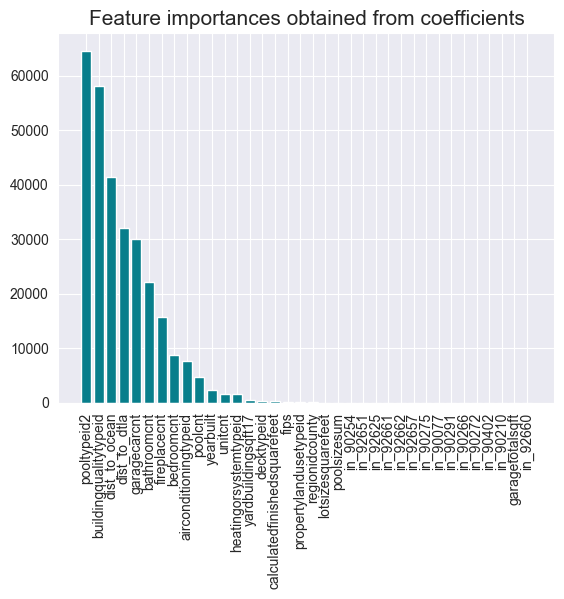

In [15]:
# feature importance plot

con_importance = pd.DataFrame(data={'Feature': X_train_con_scaled.columns, 'Importance': np.abs(model_con.params)})
con_importance = con_importance.sort_values(by='Importance', ascending=False)

plt.bar(x=con_importance['Feature'], height=con_importance['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()

In [17]:
# training MAE and RMSE
get_eval_metrics([model_con], X_train_con_scaled, Y_train_con)

# testing MAE and RMSE
# need to add intercept to test data first
X_test_con = stats.add_constant(X_test_con)
get_eval_metrics([model_con], X_test_con_scaled, Y_test_con)

#average log error
get_avg_log_error(model_con, X_test_con_scaled, Y_test_con)

Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x157f29070>
MAE: 132788.67021174938, RMSE: 189923.21480741646
Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x157f29070>
MAE: 132301.7485743162, RMSE: 188724.0781827344
Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x157f29070>
log_error: -0.06325961051669561


/Users/laurenflemmer/Library/Python/3.8/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# multi_unit_home

## Random forest

## Gradient Boosting(XGBoost)

## Gradient Boosting(AdaBoost)

In [47]:
ada = AdaBoostRegressor()
ada.fit(X_train_mul, Y_train_mul)
# training MAE and RMSE
get_eval_metrics([ada], X_train_mul, Y_train_mul)

# testing MAE and RMSE
get_eval_metrics([ada], X_test_mul, Y_test_mul)

#average log error
get_avg_log_error(ada, X_test_mul, Y_test_mul)

Model: AdaBoostRegressor()
MAE: 193324.98837002818, RMSE: 223424.9533212161
Model: AdaBoostRegressor()
MAE: 193544.49808901516, RMSE: 224174.84676163318
Model: AdaBoostRegressor()
log_error: -0.6108815897751861


## Linear Regression

In [18]:
# standardize numeric features for lasso
X_train_mul_scaled = X_train_mul
X_test_mul_scaled = X_test_mul

scaler = StandardScaler()
X_train_mul_scaled[continuous_vars] = scaler.fit_transform(X_train_mul[continuous_vars])
X_test_mul_scaled[continuous_vars] = scaler.fit_transform(X_test_mul[continuous_vars])


In [19]:
#fitting regression model
#add constant to predictor variables
X_train_mul_scaled = stats.add_constant(X_train_mul_scaled)

#fit linear regression model
model_multi = stats.OLS(Y_train_mul, X_train_mul_scaled).fit_regularized(method="elastic_net", alpha=1.0, L1_wt=1)

#view model summary (not available for regularized fit)
#print(model_multi.summary())


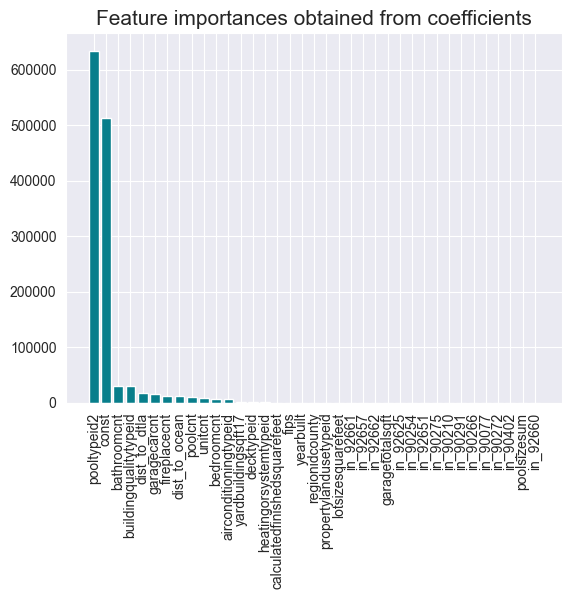

In [20]:
# feature importance plot

mul_importance = pd.DataFrame(data={'Feature': X_train_mul_scaled.columns, 'Importance': np.abs(model_multi.params)})
mul_importance = mul_importance.sort_values(by='Importance', ascending=False)

plt.bar(x=mul_importance['Feature'], height=mul_importance['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()

In [22]:
# training MAE and RMSE
get_eval_metrics([model_multi], X_train_mul_scaled, Y_train_mul)

# testing MAE and RMSE
# need to add intercept to test data first
X_test_mul_scaled = stats.add_constant(X_test_mul_scaled)
get_eval_metrics([model_multi], X_test_mul_scaled, Y_test_mul)

#average log error
get_avg_log_error(model_multi, X_test_mul_scaled, Y_test_mul)

Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x2aaae35e0>
MAE: 187739.0243917719, RMSE: 271819.0564949864
Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x2aaae35e0>
MAE: 187033.43201842005, RMSE: 273088.000070783
Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x2aaae35e0>
log_error: -0.19576265980685859


# Single Family

## Random forest

## Gradient Boosting(XGBoost)

## Gradient Boosting(AdaBoost)

In [65]:
ada = AdaBoostRegressor()
ada.fit(X_train_sin, Y_train_sin)
# training MAE and RMSE
get_eval_metrics([ada], X_train_sin, Y_train_sin)

# testing MAE and RMSE
get_eval_metrics([ada], X_test_sin, Y_test_sin)

#average log error
get_avg_log error(ada, X_test_con, Y_test_con)

Model: AdaBoostRegressor()
MAE: 254846.8011691013, RMSE: 292522.85173059
Model: AdaBoostRegressor()
MAE: 254758.31829444793, RMSE: 292282.52530328865


## Linear Regression

In [23]:
# standardize numeric features for lasso
X_train_sin_scaled = X_train_sin
X_test_sin_scaled = X_test_sin

scaler = StandardScaler()
X_train_sin_scaled[continuous_vars] = scaler.fit_transform(X_train_sin[continuous_vars])
X_test_sin_scaled[continuous_vars] = scaler.fit_transform(X_test_sin[continuous_vars])

In [24]:
#fitting regression model
#add constant to predictor variables
X_train_sin_scaled = stats.add_constant(X_train_sin_scaled)

#fit linear regression model
model_sin = stats.OLS(Y_train_sin, X_train_sin_scaled).fit_regularized(method="elastic_net", alpha=1.0, L1_wt=1)

#view model summary (not available for regularized fit)
#print(model_sin.summary())


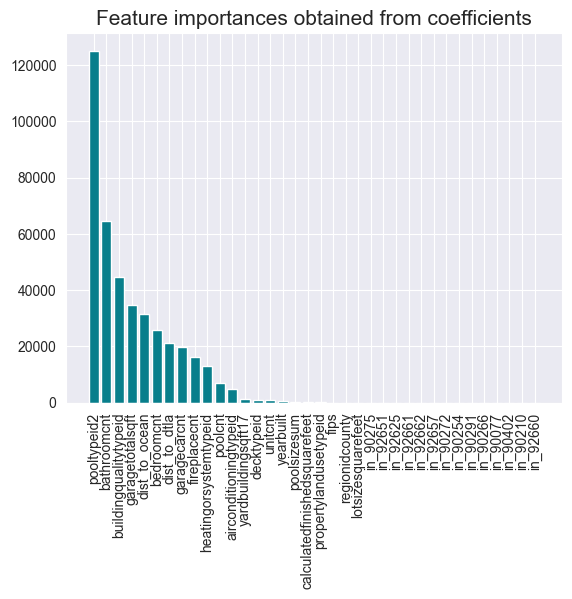

In [25]:
# feature importance plot

sin_importance = pd.DataFrame(data={'Feature': X_train_sin_scaled.columns, 'Importance': np.abs(model_sin.params)})
sin_importance = sin_importance.sort_values(by='Importance', ascending=False)

plt.bar(x=sin_importance['Feature'], height=sin_importance['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()

In [26]:
# training MAE and RMSE
get_eval_metrics([model_sin], X_train_sin_scaled, Y_train_sin)

# testing MAE and RMSE
# need to add intercept to test data first
X_test_sin = stats.add_constant(X_test_sin_scaled)
get_eval_metrics([model_sin], X_test_sin_scaled, Y_test_sin)

#average log error
get_avg_log_error(model_sin, X_test_sin_scaled, Y_test_sin)

Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x16c086580>
MAE: 190390.40724237153, RMSE: 275768.1180780162
Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x16c086580>
MAE: 190781.0439428126, RMSE: 275971.137665616
Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x16c086580>
log_error: -0.146495923345595


/Users/laurenflemmer/Library/Python/3.8/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Townhouse

## Random forest

## Gradient Boosting(XGBoost)

## Gradient Boosting(AdaBoost)

In [62]:
ada = AdaBoostRegressor()
ada.fit(X_train_town, Y_train_town)
# training MAE and RMSE
get_eval_metrics([ada], X_train_town, Y_train_town)
# testing MAE and RMSE
get_eval_metrics([ada], X_test_town, Y_test_town)
#average log error
get_avg_log_error(ada, X_test_con, Y_test_con)

Model: AdaBoostRegressor()
MAE: 122570.7273981219, RMSE: 145035.4344592369
Model: AdaBoostRegressor()
MAE: 123454.14709660552, RMSE: 145519.21521441775


## Linear Regression

In [27]:
# standardize numeric features for lasso
X_train_town_scaled = X_train_town
X_test_town_scaled = X_test_town

scaler = StandardScaler()
X_train_town_scaled[continuous_vars] = scaler.fit_transform(X_train_town[continuous_vars])
X_test_town_scaled[continuous_vars] = scaler.fit_transform(X_test_town[continuous_vars])

In [28]:
#fitting regression model
#add constant to predictor variables
X_train_town_scaled = stats.add_constant(X_train_town_scaled)

#fit linear regression model
model_town = stats.OLS(Y_train_town, X_train_town_scaled).fit_regularized(method="elastic_net", alpha=1.0, L1_wt=1)

#view model summary (not available for regularized fit)
#print(model_town.summary())


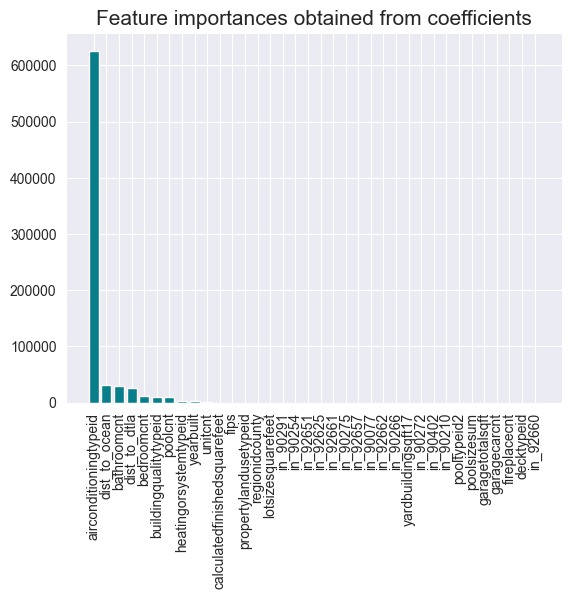

In [29]:
# feature importance plot

town_importance = pd.DataFrame(data={'Feature': X_train_town_scaled.columns, 'Importance': np.abs(model_town.params)})
town_importance = town_importance.sort_values(by='Importance', ascending=False)

plt.bar(x=town_importance['Feature'], height=town_importance['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()

In [30]:
# training MAE and RMSE
get_eval_metrics([model_town], X_train_town_scaled, Y_train_town)

# testing MAE and RMSE
# need to add intercept to test data first
X_test_town_scaled = stats.add_constant(X_test_town_scaled)
get_eval_metrics([model_town], X_test_town_scaled, Y_test_town)

#average log error
get_avg_log_error(model_town, X_test_town_scaled, Y_test_town)

Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x16bfd0730>
MAE: 135533.08782376032, RMSE: 190871.84650313377
Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x16bfd0730>
MAE: 134192.1804840942, RMSE: 190705.66873802512
Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x16bfd0730>
log_error: -0.06232027531122192


/Users/laurenflemmer/Library/Python/3.8/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


# Mobile Home

## Random forest

## Gradient Boosting(XGBoost)

## Gradient Boosting(AdaBoost)

In [59]:
ada = AdaBoostRegressor()
ada.fit(X_train_mob, Y_train_mob)
# training MAE and RMSE
get_eval_metrics([ada], X_train_mob, Y_train_mob)

# testing MAE and RMSE
get_eval_metrics([ada], X_test_mob, Y_test_mob)

#average log error
get_avg_log_error(ada, X_test_con, Y_test_con)

Model: AdaBoostRegressor()
MAE: 68140.43917512514, RMSE: 70891.87278956277
Model: AdaBoostRegressor()
MAE: 68588.90481014225, RMSE: 71203.7193121193


## Linear Regression

In [31]:
# standardize numeric features for lasso
X_train_mob_scaled = X_train_mob
X_test_mob_scaled = X_test_mob

scaler = StandardScaler()
X_train_mob_scaled[continuous_vars] = scaler.fit_transform(X_train_mob[continuous_vars])
X_test_mob_scaled[continuous_vars] = scaler.fit_transform(X_test_mob[continuous_vars])

In [32]:
#fitting regression model
#add constant to predictor variables
X_train_mob_scaled = stats.add_constant(X_train_mob_scaled)

#fit linear regression model
model_mob = stats.OLS(Y_train_mob, X_train_mob_scaled).fit_regularized(method="elastic_net", alpha=1.0, L1_wt=1)

#view model summary (not available for regularized fit)
#print(model_mob.summary())


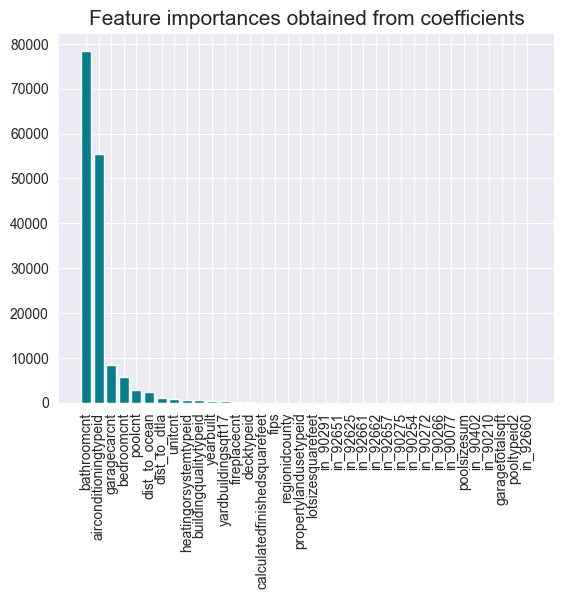

In [33]:
# feature importance plot

mob_importance = pd.DataFrame(data={'Feature': X_train_mob_scaled.columns, 'Importance': np.abs(model_mob.params)})
mob_importance = mob_importance.sort_values(by='Importance', ascending=False)

plt.bar(x=mob_importance['Feature'], height=mob_importance['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()

In [34]:
# training MAE and RMSE
get_eval_metrics([model_mob], X_train_mob_scaled, Y_train_mob)

# testing MAE and RMSE
# need to add intercept to test data first
X_test_mob_scaled = stats.add_constant(X_test_mob_scaled)
get_eval_metrics([model_mob], X_test_mob_scaled, Y_test_mob)

#average log error
get_avg_log_error(model_mob, X_test_mob_scaled, Y_test_mob)

Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x16bf41d00>
MAE: 19959.66523933075, RMSE: 48268.872019691684
Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x16bf41d00>
MAE: 20559.147336553873, RMSE: 46787.64246511421
Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x16bf41d00>
log_error: -0.32296840524719717


/Users/laurenflemmer/Library/Python/3.8/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


## Full data

## Random forest

In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# Fraction of original dataset given to any individual tree
max_samples = [0.1, 0.2]
# Number of features to consider at every split
max_features = ['auto', 0.4, 0.6, 0.8, 0.9]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(50, 100, num = 4)]
# max_depth.append(None)
# Minimum number of samples required at each leaf node
min_samples_leaf = [16, 32, 48]

# Create the tuning grid
param_grid = {
    'max_samples': max_samples,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
}

In [7]:
###### Random Grid Sample Code #######
# Use the random grid to narrow down best hyperparameters

# First create the base model to tune
rf = RandomForestRegressor(max_samples=0.1)

# Random search of parameters, using 3 fold cross validation, 
# search across 20 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=20, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the random search model
rf_random.fit(X, Y)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
/usr/local/linux/anaconda3.8/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 115.4min
[Parallel(n_jobs=6)]: Done  60 out of  60 | elapsed: 210.9min finished


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(max_samples=0.1),
                   n_iter=20, n_jobs=6,
                   param_distributions={'max_depth': [50, 66, 83, 100],
                                        'max_features': ['auto', 0.4, 0.6, 0.8,
                                                         0.9],
                                        'max_samples': [0.1, 0.2],
                                        'min_samples_leaf': [16, 32, 48]},
                   random_state=42, verbose=2)

In [36]:
# Output the best estimator from grid search and it's hyperparameters 
best_rf = rf_random.best_params_


In [37]:
best_rf

{'min_samples_leaf': 16,
 'max_samples': 0.1,
 'max_features': 'auto',
 'max_depth': 50}

## Gradient Boosting(XGBoost)

In [15]:
best_params = {
    'n_estimators': 500, #number of trees before voting
    'max_samples': 0.1,
    'max_depth': 50,
    'max_features': 'auto',
    'min_samples_leaf': 16,    
    'random_state': 42, 
}

ran_forest = RandomForestRegressor(**best_params)
ran_forest.fit(X_train, Y_train)

# training MAE and RMSE
get_eval_metrics([ran_forest], X_train, Y_train)
# testing MAE and RMSE
get_eval_metrics([ran_forest], X_test, Y_test)

Model: RandomForestRegressor(max_depth=50, max_samples=0.1, min_samples_leaf=16,
                      n_estimators=500, random_state=42)
MAE: 22449.012635955376, RMSE: 51592.35477736995
Model: RandomForestRegressor(max_depth=50, max_samples=0.1, min_samples_leaf=16,
                      n_estimators=500, random_state=42)
MAE: 22833.52842481755, RMSE: 51641.94465427887


In [8]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer

In [9]:



d_train = xgb.DMatrix(X_train, label=Y_train)
d_valid = xgb.DMatrix(X_test, label=Y_test)


print('Training ...')

params = {}
params['eta'] = 0.3
params['objective'] = 'reg:linear'
params['eval_metric'] = 'mae'
params['max_depth'] = 4
params['silent'] = 1

watchlist = [(d_train, 'train'), (d_valid, 'valid')]
clf = xgb.train(params, d_train, 10000, watchlist, early_stopping_rounds=5, verbose_eval=50)



d_test = xgb.DMatrix(X_test)


print('Predicting on test ...')

p_test = clf.predict(d_test)



Training ...
[20:45:52] WARNING: ../src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[20:45:52] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



/accounts/grad/huz4/.local/lib/python3.11/site-packages/xgboost/core.py:617: FutureWarning: Pass `evals` as keyword args.
  warnings.warn(msg, FutureWarning)


[0]	train-mae:281270.59601	valid-mae:281734.08348
[50]	train-mae:24794.43026	valid-mae:24883.22666
[100]	train-mae:21239.11864	valid-mae:21340.69457
[150]	train-mae:19335.41775	valid-mae:19462.01442
[200]	train-mae:18148.18923	valid-mae:18294.96032
[250]	train-mae:17299.39824	valid-mae:17471.96939
[300]	train-mae:16711.98843	valid-mae:16904.86541
[350]	train-mae:16192.55676	valid-mae:16398.45814
[400]	train-mae:15764.32894	valid-mae:15982.99182
[450]	train-mae:15390.94534	valid-mae:15625.43400
[500]	train-mae:15037.73249	valid-mae:15294.65313
[550]	train-mae:14710.55974	valid-mae:14989.44919
[600]	train-mae:14481.83281	valid-mae:14776.42658
[650]	train-mae:14317.10993	valid-mae:14626.50797
[700]	train-mae:14152.32565	valid-mae:14480.49631
[750]	train-mae:13988.07280	valid-mae:14331.88284
[800]	train-mae:13831.69643	valid-mae:14197.09073
[850]	train-mae:13651.73114	valid-mae:14029.79877
[900]	train-mae:13524.46854	valid-mae:13915.80828
[950]	train-mae:13405.41966	valid-mae:13811.14334
[

In [20]:
import math
logerror = np.log(p_test) - np.log(Y_test)
print('mean log error', np.mean(logerror))

mean log error 0.006578937630371162


/tmp/ipykernel_3307689/925791507.py:2: RuntimeWarning: invalid value encountered in log
  logerror = np.log(p_test) - np.log(Y_test)


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

xgbModel = xgb.XGBRegressor()

# define hyperparameters
params = {'max_depth': [3,4,5,6,7,8,9], 
          'colsample_bytree': [0.3, 0.5], 'subsample': [0.6, 0.8]}


gridSearchModel = GridSearchCV(estimator=xgbModel, 
                   param_grid=params, verbose=50, n_jobs=2, 
                   scoring='neg_mean_squared_error')
gridSearchModel.fit(X_train, Y_train)

print("Best parameters from Grid Search:", gridSearchModel.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


In [22]:
 gridSearchModel.best_params_

{'colsample_bytree': 0.5, 'max_depth': 9, 'subsample': 0.8}

In [12]:
# Initialize XGBoost Model 
params = {
    'learning_rate': 0.3,
    'n_estimators': 10000,
    'random_state': 42,
}

xgb_base = xgb.XGBRegressor(**params)

In [13]:
# Fit model using early stopping and validation set 
fit_params={'early_stopping_rounds': 5, 
            'eval_metric': 'mae',
            'eval_set': [[X_test, Y_test]]}

xgb_base.fit(X_train, Y_train, **fit_params)

/accounts/grad/huz4/.local/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/accounts/grad/huz4/.local/lib/python3.11/site-packages/xgboost/sklearn.py:835: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mae:280414.27101
[1]	validation_0-mae:196770.81089
[2]	validation_0-mae:138481.22268
[3]	validation_0-mae:98116.71120
[4]	validation_0-mae:70475.72200
[5]	validation_0-mae:52413.64062
[6]	validation_0-mae:41131.34533
[7]	validation_0-mae:34752.46505
[8]	validation_0-mae:30839.37485
[9]	validation_0-mae:28958.89248
[10]	validation_0-mae:27785.03173
[11]	validation_0-mae:27107.15996
[12]	validation_0-mae:26726.87960
[13]	validation_0-mae:26206.42909
[14]	validation_0-mae:25679.29441
[15]	validation_0-mae:25468.59756
[16]	validation_0-mae:25311.29755
[17]	validation_0-mae:25130.95202
[18]	validation_0-mae:25030.55055
[19]	validation_0-mae:24585.26013
[20]	validation_0-mae:24513.87010
[21]	validation_0-mae:24394.09489
[22]	validation_0-mae:24216.29171
[23]	validation_0-mae:24138.99401
[24]	validation_0-mae:24055.17756
[25]	validation_0-mae:23793.50093
[26]	validation_0-mae:23712.67279
[27]	validation_0-mae:23678.21705
[28]	validation_0-mae:23523.37717
[29]	validation_0-mae

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.3, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

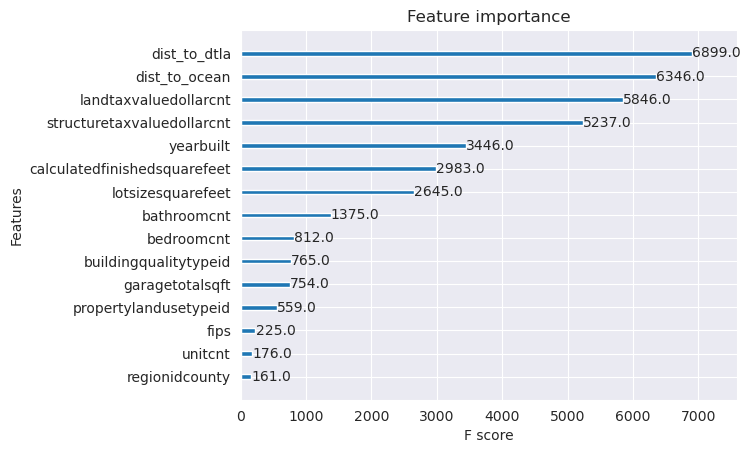

In [14]:
from xgboost import plot_importance
plot_importance(xgb_base, max_num_features = 15)

In [19]:
fit_params={'early_stopping_rounds': 10, 
            'eval_metric': 'mae',
            'verbose': False,
            'eval_set': [[X_test, Y_test]]}

get_eval_metrics([xgb_base], X_test, Y_test)
#get_cross_val_scores([xgb_base], X_prepared, y_train, cv=3, fit_params=fit_params)

Model: XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.3, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10000, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
MAE: 15754.003342989326, RMSE: 42784.2160122243


## Gradient Boosting(AdaBoost)

In [89]:
#purpose of the baseline model is to compare it to the performance of our model that utilizes adaBoost
#a tree with a depth of 3 had the lowest amount of error
crossvalidation=KFold(n_splits=10,shuffle=True,random_state=1)

for depth in range (1,10):
    tree_regressor=tree.DecisionTreeRegressor(max_depth=depth,random_state=1)
    if tree_regressor.fit(X_train, Y_train).tree_.max_depth<depth:
        break
    score=np.mean(cross_val_score(tree_regressor,X_train, Y_train,scoring='neg_mean_squared_error', cv=crossvalidation,n_jobs=1))
    print(depth, score)

1 -46344833059.82762
2 -25277656474.2639
3 -14718396893.084488
4 -9509117727.822412
5 -6491091189.639197
6 -5235825061.61236
7 -4462703574.433343
8 -3972578443.5325613
9 -3617737163.849251


In [128]:
ada = AdaBoostRegressor()
search_grid={'n_estimators':[100,500,1000],
             'learning_rate':[.001,0.01,.1],
             'random_state':[1]}

search = GridSearchCV(estimator = ada,
                    param_grid = search_grid,
                    scoring ='neg_mean_squared_error',
                    n_jobs = -1,
                    cv = crossvalidation)
search.fit(X_train, Y_train)
print(search.best_params_)
print(search.best_score_)

In [92]:
ada = AdaBoostRegressor()
ada.fit(X_train, Y_train)
# training MAE and RMSE
get_eval_metrics([ada], X_train, Y_train)
# testing MAE and RMSE
get_eval_metrics([ada], X_test, Y_test)
#average log error
get_avg_log_error(ada, X_test_con, Y_test_con)

Model: AdaBoostRegressor()
MAE: 175854.97522283802, RMSE: 203864.9193521019
Model: AdaBoostRegressor()
MAE: 175826.61547409772, RMSE: 203935.5422394603


## Linear regression

In [35]:
# standardize numeric features for lasso
X_train_scaled = X_train
X_test_scaled = X_test

scaler = StandardScaler()
X_train_scaled[continuous_vars] = scaler.fit_transform(X_train[continuous_vars])
X_test_scaled[continuous_vars] = scaler.fit_transform(X_test[continuous_vars])


In [36]:
#fitting regression model
#add constant to predictor variables
X_train = stats.add_constant(X_train_scaled)

#fit linear regression model
model_full = stats.OLS(Y_train, X_train_scaled).fit_regularized(method="elastic_net", alpha=1.0, L1_wt=1)

#view model summary (not available for regularized fit)
#print(model_full.summary())


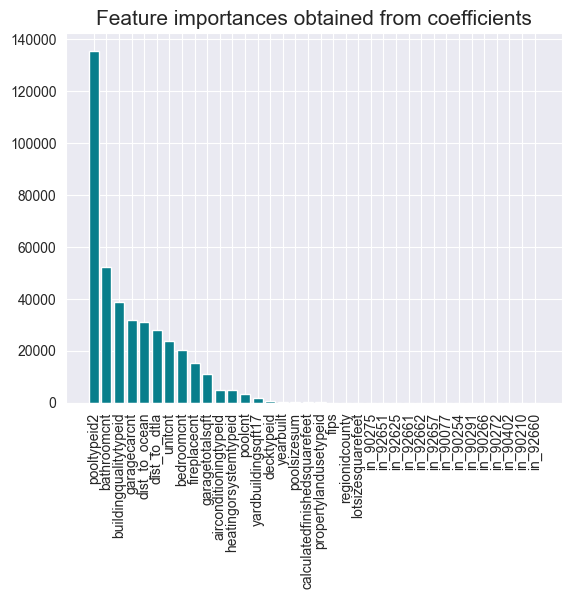

In [37]:
# feature importance plot

full_importance = pd.DataFrame(data={'Feature': X_train_scaled.columns, 'Importance': np.abs(model_full.params)})
full_importance = full_importance.sort_values(by='Importance', ascending=False)

plt.bar(x=full_importance['Feature'], height=full_importance['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=15)
plt.xticks(rotation='vertical')
plt.show()

In [38]:

# training MAE and RMSE
get_eval_metrics([model_full], X_train_scaled, Y_train)

# testing MAE and RMSE
# need to add intercept to test data first
X_test = stats.add_constant(X_test_scaled)
get_eval_metrics([model_full], X_test_scaled, Y_test)

#average log error
get_avg_log_error(model_full, X_test_scaled, Y_test)

Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x16c237f70>
MAE: 182300.51423450306, RMSE: 264646.01035960624
Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x16c237f70>
MAE: 182128.60775216165, RMSE: 264799.2130448601
Model: <statsmodels.base.elastic_net.RegularizedResultsWrapper object at 0x16c237f70>
log_error: -0.15923395181778435


/Users/laurenflemmer/Library/Python/3.8/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
